# Laboratorio 8

Ricardo Pineda | 20160164

Primero, hay que hacer los imports de las librerias que seran usadas

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

print('Importado correctamente')

Importado correctamente


Ahora, importar la data y examinarla con un head

In [153]:
dataset_MD = pd.read_csv('titanic_MD.csv')
dataset_MD.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S


# Solucion

# Parte 1

Lo primero es determinar que columnas tienen datos nulos. Para esto se usa la funcion **isna** y se suman los resultados

In [3]:
print(dataset_MD.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64


Las columnas que tienen datos nulos son: 

- Age

- SibSp

- Parch

- Fare

- Embarked

Sin embargo, hay un detalle que es importante notar. La funcion **isna** solo tomar los valores que python define como valores nulos, pero si una columna tuviera los valores nulos identificados con un caracter en especifico, como '?' por ejemplo, no los va a agarrar.

Con esto en mente, si se examina la columna *Sex* se puede notar que esta columna de hecho si tiene nulos, a pesar de que la funcion sugiere que no.

In [4]:
print(np.unique(dataset_MD.Sex))

['?' 'female' 'male']


Efectivamente, la columna Sex tiene '?' indicando nulos. <br>
Lo que hay que hacer es especificar que los simbolos '?' o cualquier otro identificador de nulos, sean cambiados a nulos de python para que la funcion los agarre.

In [5]:
simbolos = ['?', 'nan', 'NaN', 'null', 'Null']
for i in simbolos:
    dataset_MD = dataset_MD.replace(i, np.nan)
print(dataset_MD.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64


Efectivamente, ahora hay mas columnas con nulos que previamente. Esta vez, las columnas que contienen nulos son: 

- Sex

- Age

- SibSp

- Parch

- Fare

- Embarked

# Modelos para missing values

## Deletion

Este metodo es muy sencillo de implementar, pues tiene una funcion que hace precisamente esto: **dropna**

 Para medir exactamente cuantos valores fueron eliminados, usare la medida **len** del DataSet

In [6]:
a = len(dataset_MD)
b = dataset_MD.dropna()
b = len(b)
print("\n", 'Cantidad de datos originales: ' , a , "\n", 'Cantidad de datos que fueron eliminados (nulos): ', a - b, "\n", 'Nuevo total sin contar los datos nulos: ', b)


 Cantidad de datos originales:  183 
 Cantidad de datos que fueron eliminados (nulos):  83 
 Nuevo total sin contar los datos nulos:  100


Esta solucion no discrimina, simplemente encuentra valores nulos y los bota. En este caso, bota casi la mitad del dataset y es por este tipo de situaciones que generalmente se busca evitar este metodo.

## Imputación

En este caso vamos a reemplazar cada valor nulo por la media, mediana o moda de la característica a la que pertenece. Lógicamente es aplicable solo cuando la característica es numérica.
Primero, seleccionare las columnas que contienen nulos, luego hare un subset del dataset solo con las variables numericas.

In [7]:
print(dataset_MD[['Age', 'Parch', 'Fare', 'SibSp', 'Embarked', 'Sex']])

      Age  Parch     Fare  SibSp Embarked     Sex
0    38.0    0.0  71.2833    1.0        C     NaN
1    35.0    0.0  53.1000    1.0        S  female
2    54.0    0.0  51.8625    0.0        S    male
3     NaN    NaN  16.7000    1.0        S  female
4    58.0    0.0  26.5500    NaN        S  female
..    ...    ...      ...    ...      ...     ...
178  47.0    1.0      NaN    1.0        S  female
179   NaN    0.0   5.0000    0.0        S     NaN
180  56.0    NaN  83.1583    0.0      NaN  female
181  19.0    0.0  30.0000    0.0        S     NaN
182   NaN    0.0  30.0000    0.0        C     NaN

[183 rows x 6 columns]


Las columnas numericas son:

- Age

- Parch

- Fare

- SibSp

Por ende, hare un subset de la data tomando en cuenta solo esos valores:

In [8]:
dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']].head(3)

,Age,Parch,Fare,SibSp
0,38.0,0.0,71.2833,1.0
1,35.0,0.0,53.1000,1.0
2,54.0,0.0,51.8625,0.0


### Moda

Imputacion utilizando la moda. En este caso en particular si se pueden utilizar todas las variables.

In [9]:
dataset_MD[['Age', 'Parch', 'Fare', 'SibSp', 'Embarked', 'Sex']] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(dataset_MD[['Age', 'Parch', 'Fare', 'SibSp', 'Embarked', 'Sex']])

print(dataset_MD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Media

Imputacion utilizando la media

In [10]:
dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']])
print(dataset_MD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Mediana

Imputacion utilizando la mediana

In [11]:
dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(dataset_MD[['Age', 'Parch', 'Fare', 'SibSp']])
print(dataset_MD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Countplots

### Age

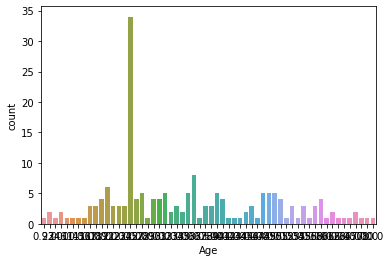

In [12]:
sns.countplot(dataset_MD[dataset_MD['Age'].notna()]['Age'])

### Parch

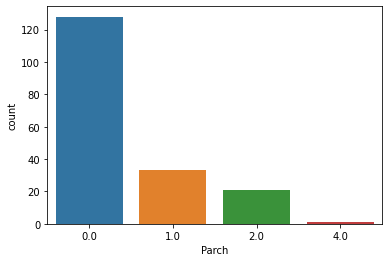

In [13]:
sns.countplot(dataset_MD[dataset_MD['Parch'].notna()]['Parch'])

### Fare

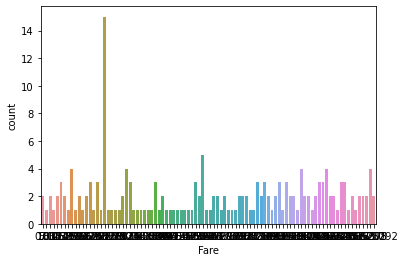

In [14]:
sns.countplot(dataset_MD[dataset_MD['Fare'].notna()]['Fare'])

### SibSp

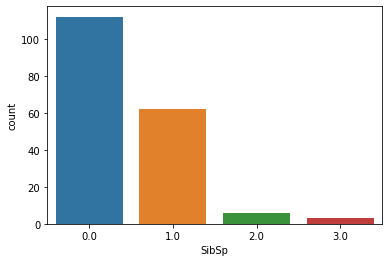

In [15]:
sns.countplot(dataset_MD[dataset_MD['SibSp'].notna()]['SibSp'])

### Sex

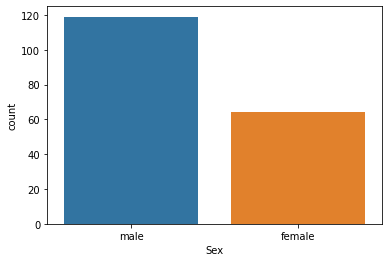

In [16]:
sns.countplot(dataset_MD[dataset_MD['Sex'].notna()]['Sex'])

### Embarked

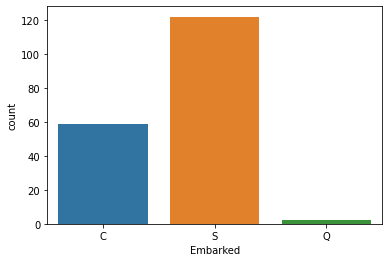

In [17]:
sns.countplot(dataset_MD[dataset_MD['Embarked'].notna()]['Embarked'])

## Imputacion sectorizada

Este tipo de imputacion se utilizada para los valores no numericos

### Sex

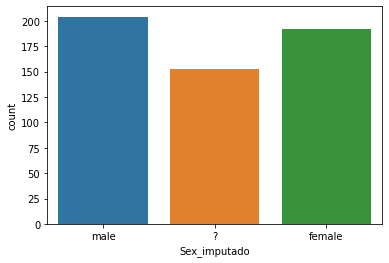

In [209]:
sex = dataset_MD.groupby(['Survived'])['Sex'].value_counts()
s = pd.DataFrame(sex)
s = s.replace('?', np.nan)

df = dataset_MD.merge(s, how = 'right', on = 'Survived')
df['Sex_imputado'] = np.where(df.Sex_x.isna(), df.Sex_y.isna(), df.Sex_x)
sns.countplot(df.Sex_imputado)

### Embarked

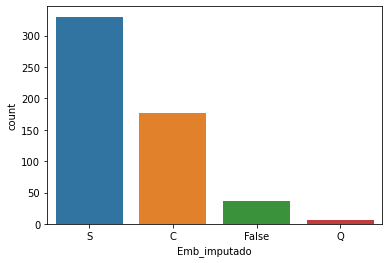

In [213]:
emb = dataset_MD.groupby(['Survived'])['Embarked'].value_counts()
e = pd.DataFrame(emb)

df = dataset_MD.merge(e, how = 'right', on = 'Survived')
df['Emb_imputado'] = np.where(df.Embarked_x.isna(), df.Embarked_y.isna(), df.Embarked_x)
sns.countplot(df.Emb_imputado)

### SibSp

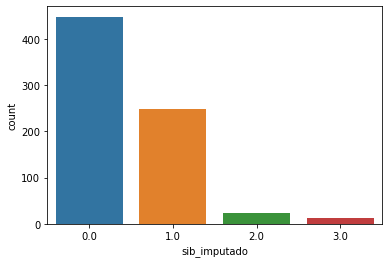

In [214]:
sibsp = dataset_MD.groupby(['Survived'])['SibSp'].value_counts()
s = pd.DataFrame(sibsp)

df = dataset_MD.merge(s, how = 'right', on = 'Survived')
df['sib_imputado'] = np.where(df.SibSp_x.isna(), df.SibSp_y.isna(), df.SibSp_x)
sns.countplot(df.sib_imputado)

### Parch

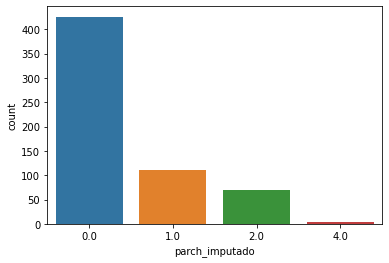

In [215]:
parch = dataset_MD.groupby(['Survived'])['Parch'].value_counts()
p = pd.DataFrame(parch)

df = dataset_MD.merge(p, how = 'right', on = 'Survived')
df['parch_imputado'] = np.where(df.Parch_x.isna(), df.Parch_y.isna(), df.Parch_x)
sns.countplot(df.parch_imputado)

## Modelo por regresion lineal simple

Este tipo de imputacion sera utilizada para los valores numericos

### Utilizando el tipo de boleto

In [18]:
ds = dataset_MD.dropna()
lm = LinearRegression()
lm = lm.fit(ds[['Survived']], ds['Fare'])

In [19]:
print("\n", 'cantidad de nulos en Fare: ', ds.Fare.isna().sum(), "\n", 'cantidad de nulos en sobrevivientes: ', ds.Survived.isna().sum(), "\n", 'cantidad de nulos en Edad: ', ds.Age.isna().sum(), "\n", 'cantidad de nulos en Parch: ', ds.Parch.isna().sum())


 cantidad de nulos en Fare:  0 
 cantidad de nulos en sobrevivientes:  0 
 cantidad de nulos en Edad:  0 
 cantidad de nulos en Parch:  0


In [20]:
ds['fare_lm'] = lm.predict(ds[['Survived']])

Posibilidad antes de la prediccion 76.67


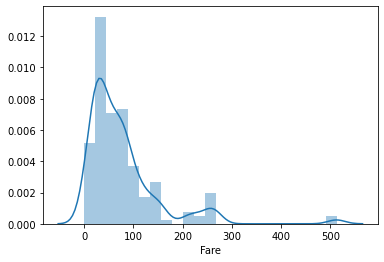

In [21]:
print('Posibilidad antes de la prediccion', round(ds.Fare.mean(), 2))
sns.distplot(ds.Fare)

Posiblidad de supervivencia luego de la prediccion:  0      82.539941
1      82.539941
2      64.630762
3      82.539941
4      82.539941
         ...    
178    82.539941
179    64.630762
180    82.539941
181    82.539941
182    82.539941
Name: fare_lm, Length: 183, dtype: float64
y-hat: 64.63 + 17.91x


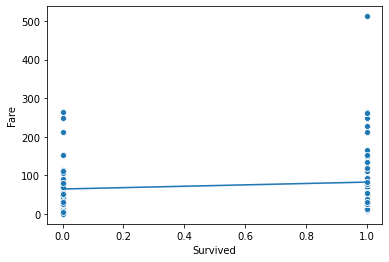

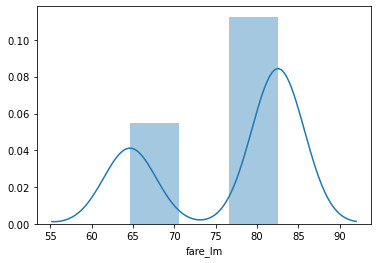

In [22]:
print('Posiblidad de supervivencia luego de la prediccion: ', ds.fare_lm)
print('y-hat: ', round(lm.intercept_,2), ' + ', round(lm.coef_[0], 2), 'x', sep = '')

sns.scatterplot(x = ds.Survived, y = ds.Fare)
sns.lineplot(x = ds.Survived, y = lm.intercept_ + (lm.coef_ * ds.Survived))

plt.ylabel('Fare')
plt.show()
sns.distplot(ds.fare_lm)
plt.show()

Luego de hacer el modelo utilizando el tipo de boleto, se estima que las personas que mas pagaron tenian mucha mayor posibilidad de sobrevivir, pues la relacion entre las variables es directa

### Utilizando la edad de los pasajeros

In [23]:
ds = dataset_MD.dropna()
lm = LinearRegression()
lm = lm.fit(ds[['Survived']], ds['Age'])

In [24]:
ds['age_lm'] = lm.predict(ds[['Survived']])

Posibilidad antes de la prediccion 34.1


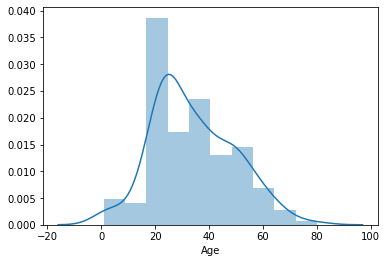

In [25]:
print('Posibilidad antes de la prediccion', round(ds.Age.mean(), 2))
sns.distplot(ds.Age)

Posiblidad de supervivencia luego de la prediccion:  0      31.438374
1      31.438374
2      39.541667
3      31.438374
4      31.438374
         ...    
178    31.438374
179    39.541667
180    31.438374
181    31.438374
182    31.438374
Name: age_lm, Length: 183, dtype: float64
y-hat: 39.54 + -8.1x


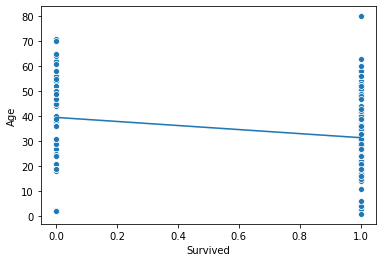

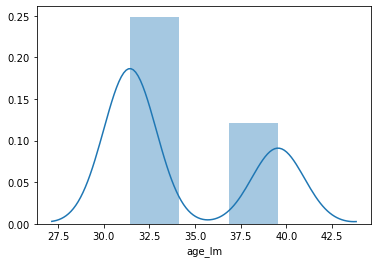

In [26]:
print('Posiblidad de supervivencia luego de la prediccion: ', ds.age_lm)
print('y-hat: ', round(lm.intercept_,2), ' + ', round(lm.coef_[0], 2), 'x', sep = '')

sns.scatterplot(x = ds.Survived, y = ds.Age)
sns.lineplot(x = ds.Survived, y = lm.intercept_ + (lm.coef_ * ds.Survived))

plt.ylabel('Age')
plt.show()
sns.distplot(ds.age_lm)
plt.show()

Al realizar el contraste entre la edad y la posibilidad de supervivencia, se puede argumetnar que no tenia mucho que ver, pues solo tiene una relacion del 31%

### Por SibSp

In [27]:
ds = dataset_MD.dropna()
lm = LinearRegression()
lm = lm.fit(ds[['Survived']], ds['SibSp'])

In [28]:
ds['sibsp_lm'] = lm.predict(ds[['Survived']])

Posibilidad antes de la prediccion 0.45


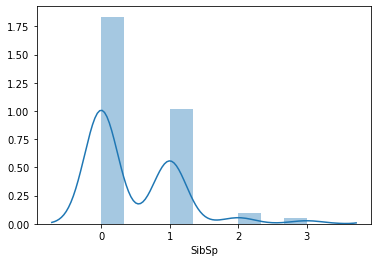

In [29]:
print('Posibilidad antes de la prediccion', round(ds.SibSp.mean(), 2))
sns.distplot(ds.SibSp)

Posiblidad de supervivencia luego de la prediccion:  0      0.504065
1      0.504065
2      0.350000
3      0.504065
4      0.504065
         ...   
178    0.504065
179    0.350000
180    0.504065
181    0.504065
182    0.504065
Name: sibsp_lm, Length: 183, dtype: float64
y-hat: 0.35 + 0.15x


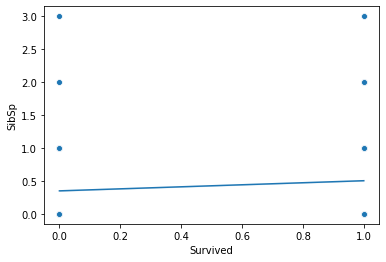

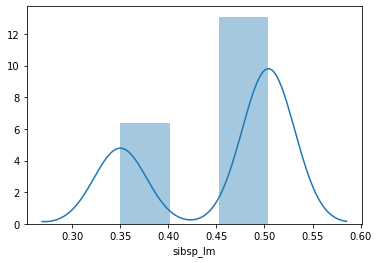

In [30]:
print('Posiblidad de supervivencia luego de la prediccion: ', ds.sibsp_lm)
print('y-hat: ', round(lm.intercept_,2), ' + ', round(lm.coef_[0], 2), 'x', sep = '')

sns.scatterplot(x = ds.Survived, y = ds.SibSp)
sns.lineplot(x = ds.Survived, y = lm.intercept_ + (lm.coef_ * ds.Survived))

plt.ylabel('SibSp')
plt.show()
sns.distplot(ds.sibsp_lm)
plt.show()

Luego de hacer la comparacion entre estas variables, es notable que tiene un 50% de relacion con la posibilidad de los pasajeros para sobrevivir

### Por Parch

In [31]:
ds = dataset_MD.dropna()
lm = LinearRegression()
lm = lm.fit(ds[['Survived']], ds['Parch'])

In [32]:
ds['parch_lm'] = lm.predict(ds[['Parch']])

Posibilidad antes de la prediccion 0.43


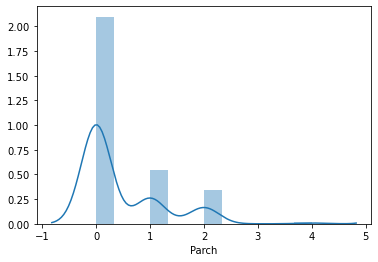

In [33]:
print('Posibilidad antes de la prediccion', round(ds.Parch.mean(), 2))
sns.distplot(ds.Parch)

Posiblidad de supervivencia luego de la prediccion:  0      0.450000
1      0.450000
2      0.450000
3      0.450000
4      0.450000
         ...   
178    0.422764
179    0.450000
180    0.450000
181    0.450000
182    0.450000
Name: parch_lm, Length: 183, dtype: float64
y-hat: 0.45 + -0.03x


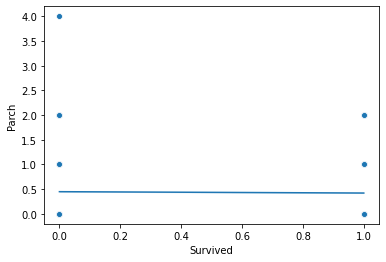

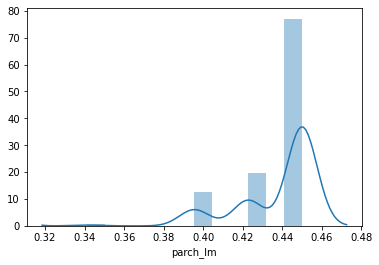

In [34]:
print('Posiblidad de supervivencia luego de la prediccion: ', ds.parch_lm)
print('y-hat: ', round(lm.intercept_,2), ' + ', round(lm.coef_[0], 2), 'x', sep = '')

sns.scatterplot(x = ds.Survived, y = ds.Parch)
sns.lineplot(x = ds.Survived, y = lm.intercept_ + (lm.coef_ * ds.Survived))

plt.ylabel('Parch')
plt.show()
sns.distplot(ds.parch_lm)
plt.show()

Tras hacer la comparacion entre estas variables, se puede determinar que tiene un alto nivel de incidencia en si los pasajeros sobreviven o no.

## Outliers

### Metodo: desviacion estandar

En este metodo, todos los valores con una distancia = factor * desviacion estandar son considerados outliers

### Fare

In [35]:
f = 2
xl = dataset_MD.Fare.mean() - (dataset_MD.Fare.std()*f)
xu = dataset_MD.Fare.mean() + (dataset_MD.Fare.std()*f)
print('Lower Value = ', xl)
print('Upper Value = ', xu)

Lower Value =  -75.48603586369163
Upper Value =  228.82219324074075


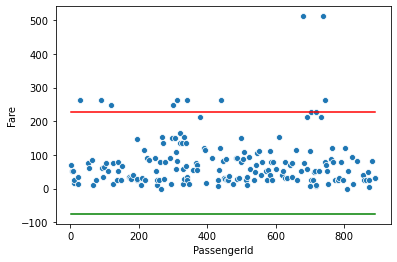

In [36]:
sns.scatterplot(x = dataset_MD.PassengerId, y = dataset_MD.Fare)
sns.lineplot(x = dataset_MD.PassengerId, y = xl, color = 'green')
sns.lineplot(x = dataset_MD.PassengerId, y = xu, color = 'red')

Eliminar las observaciones que son outliers

In [37]:
df = dataset_MD[(dataset_MD.Fare > xl) & (dataset_MD.Fare < xu)]
df.Fare.describe()

count    173.000000
mean      63.201205
std       46.764818
min        0.000000
25%       26.550000
50%       53.100000
75%       83.158300
max      227.525000
Name: Fare, dtype: float64

Aplicar un *cap* en los limites

In [38]:
dataset_MD['Fare_sd'] = np.where(
    dataset_MD.Fare<xl, xl, np.where(dataset_MD.Fare>xu, xu, dataset_MD.Fare)
)
dataset_MD[['Fare', 'Fare_sd']].describe()

,Fare,Fare_sd
count,183.000000,183.000000
mean,76.668079,72.251532
std,76.077057,59.089659
min,0.000000,0.000000
25%,26.550000,26.550000
50%,55.441700,55.441700
75%,90.000000,90.000000
max,512.329200,228.822193


### Age

In [39]:
f = 2
xl = dataset_MD.Age.mean() - (dataset_MD.Age.std()*f)
xu = dataset_MD.Age.mean() + (dataset_MD.Age.std()*f)
print('Lower Value = ', xl)
print('Upper Value = ', xu)

Lower Value =  3.945791041082323
Upper Value =  64.24459147257889


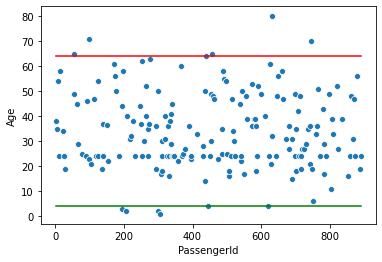

In [40]:
sns.scatterplot(x = dataset_MD.PassengerId, y = dataset_MD.Age)
sns.lineplot(x = dataset_MD.PassengerId, y = xl, color = 'green')
sns.lineplot(x = dataset_MD.PassengerId, y = xu, color = 'red')

In [41]:
df = dataset_MD[(dataset_MD.Age > xl) & (dataset_MD.Age < xu)]
df.Fare.describe()

count    174.00000
mean      77.39375
std       77.10084
min        0.00000
25%       26.84270
50%       55.67085
75%       90.00000
max      512.32920
Name: Fare, dtype: float64

In [42]:
dataset_MD['Age_sd'] = np.where(
    dataset_MD.Age<xl, xl, np.where(dataset_MD.Age>xu, xu, dataset_MD.Age)
)
dataset_MD[['Age', 'Age_sd']].describe()

,Age,Age_sd
count,183.000000,183.000000
mean,34.095191,33.975443
std,15.074700,14.589782
min,0.920000,3.945791
25%,24.000000,24.000000
50%,31.000000,31.000000
75%,46.500000,46.500000
max,80.000000,64.244591


### SibSp

In [43]:
f = 2
xl = dataset_MD.SibSp.mean() - (dataset_MD.SibSp.std()*f)
xu = dataset_MD.SibSp.mean() + (dataset_MD.SibSp.std()*f)
print('Lower Value = ', xl)
print('Upper Value = ', xu)

Lower Value =  -0.833366130510067
Upper Value =  1.7404699556466792


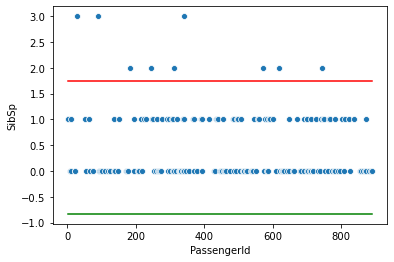

In [44]:
sns.scatterplot(x = dataset_MD.PassengerId, y = dataset_MD.SibSp)
sns.lineplot(x = dataset_MD.PassengerId, y = xl, color = 'green')
sns.lineplot(x = dataset_MD.PassengerId, y = xu, color = 'red')

In [45]:
df = dataset_MD[(dataset_MD.SibSp > xl) & (dataset_MD.SibSp < xu)]
df.Fare.describe()

count    174.000000
mean      71.822007
std       71.016388
min        0.000000
25%       26.550000
50%       54.050000
75%       86.500000
max      512.329200
Name: Fare, dtype: float64

In [46]:
dataset_MD['SibSp_sd'] = np.where(
    dataset_MD.SibSp<xl, xl, np.where(dataset_MD.SibSp>xu, xu, dataset_MD.SibSp)
)
dataset_MD[['SibSp', 'SibSp_sd']].describe()

,SibSp,SibSp_sd
count,183.000000,183.000000
mean,0.453552,0.424395
std,0.643459,0.556198
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,1.740470


### Parch

In [47]:
f = 2
xl = dataset_MD.Parch.mean() - (dataset_MD.Parch.std()*f)
xu = dataset_MD.Parch.mean() + (dataset_MD.Parch.std()*f)
print('Lower Value = ', xl)
print('Upper Value = ', xu)

Lower Value =  -1.0425998434772266
Upper Value =  1.9059878216193031


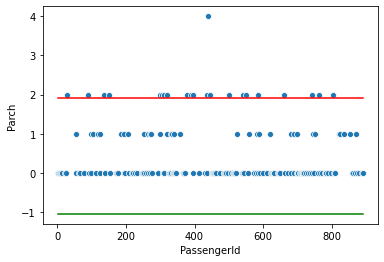

In [48]:
sns.scatterplot(x = dataset_MD.PassengerId, y = dataset_MD.Parch)
sns.lineplot(x = dataset_MD.PassengerId, y = xl, color = 'green')
sns.lineplot(x = dataset_MD.PassengerId, y = xu, color = 'red')

In [49]:
df = dataset_MD[(dataset_MD.Parch > xl) & (dataset_MD.Parch < xu)]
df.Fare.describe()

count    161.000000
mean      67.710198
std       70.932837
min        0.000000
25%       26.550000
50%       52.554200
75%       79.650000
max      512.329200
Name: Fare, dtype: float64

In [50]:
dataset_MD['Parch_sd'] = np.where(
    dataset_MD.Parch<xl, xl, np.where(dataset_MD.Parch>xu, xu, dataset_MD.Parch)
)
dataset_MD[['Parch', 'Parch_sd']].describe()

,Parch,Parch_sd
count,183.000000,183.000000
mean,0.431694,0.409463
std,0.737147,0.672210
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,4.000000,1.905988


## Metodo: Por percentiles

Este metodo considera la distribucion de los valores minimos

### Fare

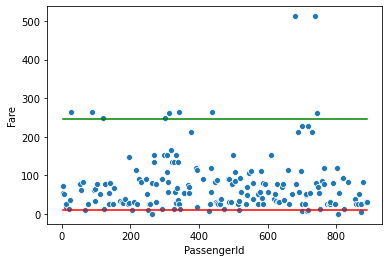

In [51]:
pl = np.percentile(dataset_MD.Fare, 5)
pu = np.percentile(dataset_MD.Fare, 95)

sns.scatterplot(x = dataset_MD.PassengerId, y = dataset_MD.Fare)
sns.lineplot(x = df.PassengerId, y = pl, color = 'red')
sns.lineplot(x = df.PassengerId, y = pu, color = 'green')

In [52]:
df_sd = dataset_MD[(dataset_MD.Fare >= pl) % dataset_MD.Fare <= pu]
df_sd.Fare.describe()

count    181.000000
mean      77.515240
std       76.065721
min        5.000000
25%       27.720800
50%       55.900000
75%       90.000000
max      512.329200
Name: Fare, dtype: float64

In [53]:
dataset_MD['Fare_pct'] = np.where(
    dataset_MD.Fare<pl, pl, np.where(dataset_MD.Fare>pu, pu, dataset_MD.Fare)
)
dataset_MD[['Fare', 'Fare_pct', 'Fare_sd']].describe()

,Fare,Fare_pct,Fare_sd
count,183.000000,183.000000,183.000000
mean,76.668079,73.353801,72.251532
std,76.077057,61.383550,59.089659
min,0.000000,10.500000,0.000000
25%,26.550000,26.550000,26.550000
50%,55.441700,55.441700,55.441700
75%,90.000000,90.000000,90.000000
max,512.329200,245.521220,228.822193


### Age

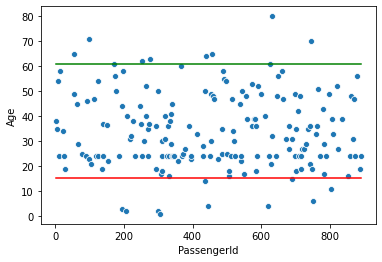

In [54]:
pl = np.percentile(dataset_MD.Age, 5)
pu = np.percentile(dataset_MD.Age, 95)

sns.scatterplot(x = dataset_MD.PassengerId, y = dataset_MD.Age)
sns.lineplot(x = df.PassengerId, y = pl, color = 'red')
sns.lineplot(x = df.PassengerId, y = pu, color = 'green')

In [55]:
df_sd = dataset_MD[(dataset_MD.Age >= pl) % dataset_MD.Age <= pu]
df_sd.Age.describe()

count    183.000000
mean      34.095191
std       15.074700
min        0.920000
25%       24.000000
50%       31.000000
75%       46.500000
max       80.000000
Name: Age, dtype: float64

In [56]:
dataset_MD['Age_pct'] = np.where(
    dataset_MD.Age<pl, pl, np.where(dataset_MD.Age>pu, pu, dataset_MD.Age)
)
dataset_MD[['Age', 'Age_pct', 'Age_sd']].describe()

,Age,Age_pct,Age_sd
count,183.000000,183.000000,183.000000
mean,34.095191,34.292350,33.975443
std,15.074700,13.565026,14.589782
min,0.920000,15.100000,3.945791
25%,24.000000,24.000000,24.000000
50%,31.000000,31.000000,31.000000
75%,46.500000,46.500000,46.500000
max,80.000000,60.900000,64.244591


### SibSp

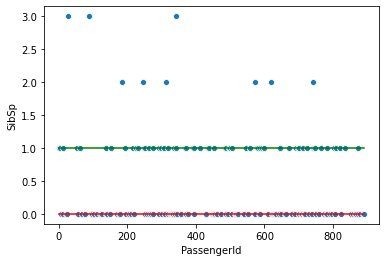

In [57]:
pl = np.percentile(dataset_MD.SibSp, 5)
pu = np.percentile(dataset_MD.SibSp, 95)

sns.scatterplot(x = dataset_MD.PassengerId, y = dataset_MD.SibSp)
sns.lineplot(x = df.PassengerId, y = pl, color = 'red')
sns.lineplot(x = df.PassengerId, y = pu, color = 'green')

In [58]:
df_sd = dataset_MD[(dataset_MD.SibSp >= pl) % dataset_MD.SibSp <= pu]
df_sd.SibSp.describe()

count    71.000000
mean      1.169014
std       0.477670
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: SibSp, dtype: float64

In [59]:
dataset_MD['SibSp_pct'] = np.where(
    dataset_MD.SibSp<pl, pl, np.where(dataset_MD.SibSp>pu, pu, dataset_MD.SibSp)
)
dataset_MD[['SibSp', 'SibSp_pct', 'SibSp_sd']].describe()

,SibSp,SibSp_pct,SibSp_sd
count,183.000000,183.000000,183.000000
mean,0.453552,0.387978,0.424395
std,0.643459,0.488626,0.556198
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,3.000000,1.000000,1.740470


### Parch

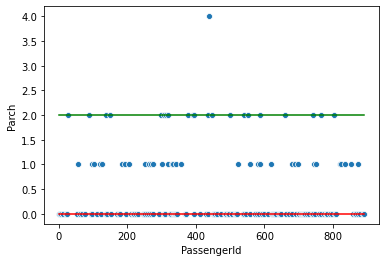

In [60]:
pl = np.percentile(dataset_MD.Parch, 5)
pu = np.percentile(dataset_MD.Parch, 95)

sns.scatterplot(x = dataset_MD.PassengerId, y = dataset_MD.Parch)
sns.lineplot(x = df.PassengerId, y = pl, color = 'red')
sns.lineplot(x = df.PassengerId, y = pu, color = 'green')

In [61]:
df_sd = dataset_MD[(dataset_MD.Parch >= pl) % dataset_MD.Parch <= pu]
df_sd.Parch.describe()

count    55.000000
mean      1.436364
std       0.601345
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: Parch, dtype: float64

In [62]:
dataset_MD['Parch_pct'] = np.where(
    dataset_MD.Parch<pl, pl, np.where(dataset_MD.Parch>pu, pu, dataset_MD.Parch)
)
dataset_MD[['Parch', 'Parch_pct', 'Parch_sd']].describe()

,Parch,Parch_pct,Parch_sd
count,183.000000,183.000000,183.000000
mean,0.431694,0.420765,0.409463
std,0.737147,0.697724,0.672210
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,4.000000,2.000000,1.905988


## Comparar los metodos usados con la data 'titanic.csv' 

Luego de comparar los resultados obtenidos contra la data del otro dataset sin alterar, argumentar que metodo se acerca mas a la realidad y por que

In [63]:
titanic = pd.read_csv('titanic.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [64]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [65]:
print(titanic.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


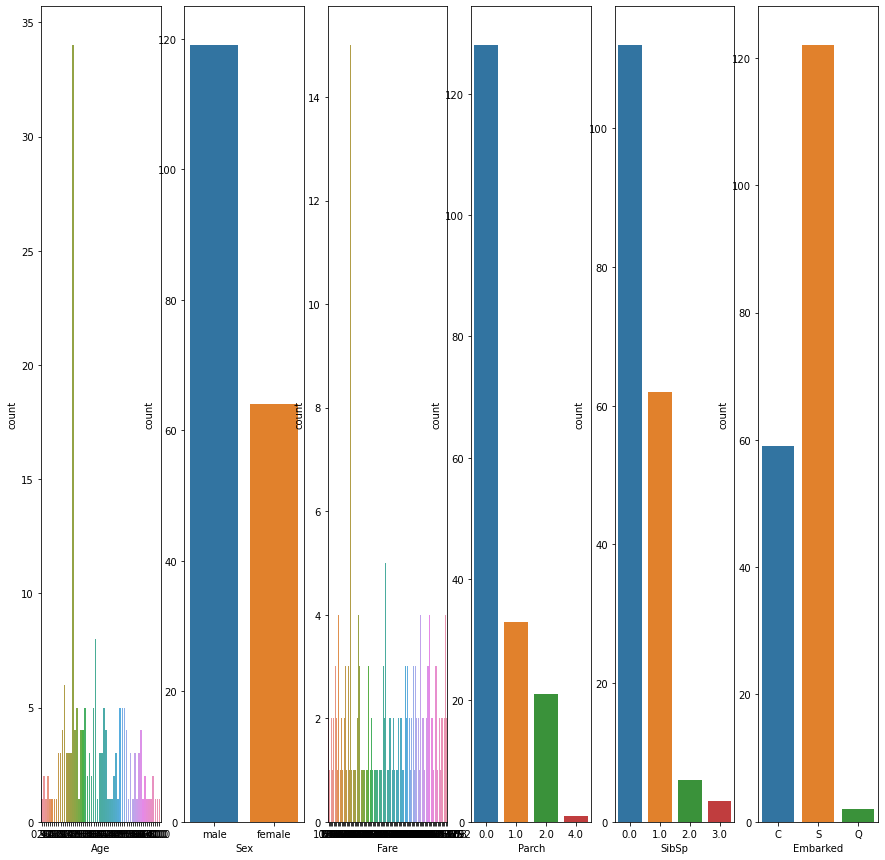

In [66]:
fig, axs = plt.subplots(ncols=6, figsize = (15,15))
sns.countplot(x = 'Age', data=dataset_MD, ax=axs[0])
sns.countplot(x = 'Sex', data=dataset_MD, ax=axs[1])
sns.countplot(x = 'Fare', data=dataset_MD, ax=axs[2])
sns.countplot(x = 'Parch', data=dataset_MD, ax=axs[3])
sns.countplot(x = 'SibSp', data=dataset_MD, ax=axs[4])
sns.countplot(x = 'Embarked', data=dataset_MD, ax=axs[5])

# Analisis de columnas

## Age

El metodo de imputacion por media fue el que mas se acerco a la realidad, por ponerlo de alguna manera. Obteniendo un resultado practicamente identico.

Por lo mismo, eliminar los datos lo unico que hace es disminuir la precision de los modelos.

## Sex

Esta es una columna complicada, dado que los valores son binarios.
Ademas, si se analiza la distribucion, de por si ya hay muchos mas hombres que mujeres. Al aplicar cualquiera de los metodos, esto solo se ve resaltado.

Seria interesante normalizar este desbalance antes de aplicar algun metodo.

## Fare

Esta columna tuvo resultados mixtos. Por un lado, con algunos metodos como la imputacion por media por ejemplo, se obtuvieron buenos resultados en algunos aspectos, pero peores en otros.

Esa misma tendencia se mantiene a lo largo del analisis entero.

## Parch

Al igual que con la columna de *fare*, el resultado fue el esperado con el metodo de imputacion por media. Es importante resaltar que la regresion lineal tambien tuvo buenos resultados.

## SibSp

El metodo de imputacion sectorizada fue notablemente el mas certero, cosa que resulta curioso pues es una columna numerica, y este metodo es usualmente usado para columnas no numericas.

Aun asi, es notable que clasifico las variables con una exactitud alta.

## Embarked

Con esta columna no se obtuvieron resultados particularmente altos o certeros. Puede que exista un fenomeno similar al que se ve con la columna de *sex*, puesto que a pesar de que si son tres observaciones distintas, la tercera casi no tiene observaciones, por lo que es practicamente una columna binaria.

## Conclusiones finales

Existe una columna literalmente binaria, y otra practicamente binaria, y coincidentemente fueron las columnas con los resultados menos impresionantes, lo que podria indicar que es necesario usar un metodo binario para ellas dos, o utilizar algun metodo de oversampling en el caso de *Embarked*

La elimincarion de outliers no fue efectiva en este caso, pero argumentaria que es por la forma de elegir los outliers en primer lugar, pues no son valores explicitamente atipicos.

La mayoria de las columnas eran numericas, lo que introduce cierto grado de *bias* en nuestro analisis, pues nos limita a utilizar los mismos metodos para practicamente todo el dataset. Esto no quiere decir que no se puedan utilizar metodos distintos, y me pareceria una buena practica hacerlo para determinar si con ellos se obtienen mejores resultados.

# Parte 2

Normalizar las columnas numericas usando los metodos: 

- Standarization

- MinMaxScaling

- MaxAbsScaler

Luego, comparar contra la data de 'titanic.csv'

## Data

In [110]:
df = pd.read_csv('titanic_MD.csv')
df_completa = pd.read_csv('titanic.csv')

In [112]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Mostrar los tipos de datos para determinar que tipo usar en la seleccion de columnas numericas

In [136]:
numerico = df.select_dtypes(include=['int64', 'float64'])
numerico_completa = df_completa.select_dtypes(include=['int64','float64'])

simbolos = ['?', 'na', 'nan', 'NaN', 'null']

for i in simbolos:
    numerico.replace(i, np.nan)
    numerico_completa.replace(i, np.nan)

## Estandarizacion

In [137]:
estandar = numerico
estandar_completa = numerico_completa

for i in estandar.columns:
    estandar[i+'_2'] = StandardScaler().fit_transform(estandar[[i]])

for i in estandar_completa.columns:
    estandar_completa[i+'_2'] = StandardScaler().fit_transform(estandar_completa[[i]])

### Con la Data MD

In [138]:
estandar[['Age_2', 'SibSp_2', 'Parch_2', 'Fare_2']].describe()

,Age_2,SibSp_2,Parch_2,Fare_2
count,1.580000e+02,1.800000e+02,1.710000e+02,175.000000
mean,-2.009644e-16,1.850372e-17,3.116416e-17,0.000000
std,1.003180e+00,1.002789e+00,1.002937e+00,1.002869
min,-2.230255e+00,-7.156502e-01,-6.149769e-01,-1.028035
25%,-7.499403e-01,-7.156502e-01,-6.149769e-01,-0.641346
50%,-1.234867e-02,-7.156502e-01,-6.149769e-01,-0.286827
75%,7.893814e-01,8.363623e-01,7.161756e-01,0.150775
max,2.841810e+00,3.940387e+00,4.709633e+00,5.642402


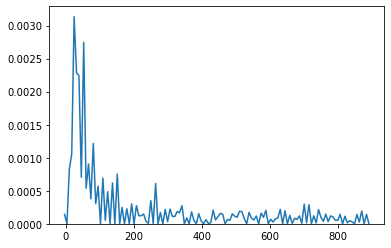

In [139]:
sns.distplot(estandar, hist=False)

### Con la Data completa

In [140]:
estandar_completa[['Age_2', 'SibSp_2', 'Parch_2', 'Fare_2']].describe()

,Age_2,SibSp_2,Parch_2,Fare_2
count,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,-1.559166e-16,-7.522823e-17,-1.092023e-17,9.585532e-17
std,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,-2.227696e+00,-7.230443e-01,-6.317298e-01,-1.033406e+00
25%,-7.483096e-01,-7.230443e-01,-6.317298e-01,-6.433299e-01
50%,2.086869e-02,-7.230443e-01,-6.317298e-01,-2.847750e-01
75%,7.579979e-01,8.336275e-01,6.970812e-01,1.486431e-01
max,2.841189e+00,3.946971e+00,4.683514e+00,5.695465e+00


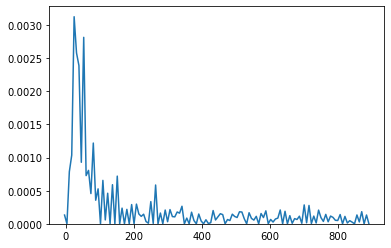

In [141]:
sns.distplot(estandar_completa, hist=False)

## Comparacion - Estandarizacion

Luego de que se aplique el mismo metodo de estandarizacion para ambos sets de datos, si se comparan los resultados del analisis estadistico posterior, es posible concluir que en la mayor parte de dicho analisis el resultado se mantiente practicamente similar en ambos. De hecho, si analismos la desviacion estandar de ambas descripciones estadisticas, es notable que son practicamente el mismo.

Por otro lado, si miramos el desgloce de la media, este si que cambio bastante, alrededor de un 25% en promedio.
Ademas, si miramos la grafica de distribucion de ambas tablas despues de efectuar la estandarizacion, es notable que tienen un importante *right skew* por lo que este metodo no es el mas efectivo para normalizar.

## Min Max Scaling

In [142]:
minmax = numerico
minmax_completo = numerico_completa

for i in minmax.columns:
    minmax[i+'_2'] = MinMaxScaler().fit_transform(minmax[[i]])

for i in minmax_completo.columns:
    minmax_completo[i+'_2'] = MinMaxScaler().fit_transform(minmax_completo[[i]])

### Con la Data MD

In [143]:
minmax[['Age_2', 'SibSp_2', 'Parch_2', 'Fare_2']].describe()

,Age_2,SibSp_2,Parch_2,Fare_2
count,158.000000,180.000000,171.000000,175.000000
mean,0.439713,0.153704,0.115497,0.154118
std,0.197785,0.215374,0.188359,0.150345
min,0.000000,0.000000,0.000000,0.000000
25%,0.291856,0.000000,0.000000,0.057971
50%,0.437279,0.000000,0.000000,0.111118
75%,0.595346,0.333333,0.250000,0.176722
max,1.000000,1.000000,1.000000,1.000000


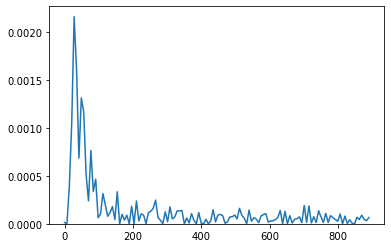

In [144]:
sns.distplot(minmax, hist=False)

In [145]:
minmax_completo[['Age_2', 'SibSp_2', 'Parch_2', 'Fare_2']].describe()

,Age_2,SibSp_2,Parch_2,Fare_2
count,183.000000,183.000000,183.000000,183.000000
mean,0.439484,0.154827,0.118852,0.153578
std,0.197823,0.214720,0.188654,0.149021
min,0.000000,0.000000,0.000000,0.000000
25%,0.291856,0.000000,0.000000,0.057971
50%,0.443601,0.000000,0.000000,0.111257
75%,0.589024,0.333333,0.250000,0.175668
max,1.000000,1.000000,1.000000,1.000000


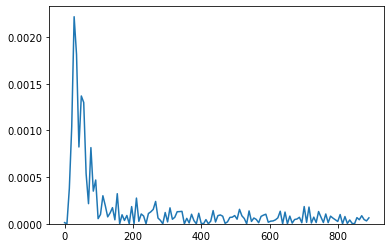

In [146]:
sns.distplot(minmax_completo, hist=False)

## Comparacion - Min Max Scaling

En este caso, al contrario que en el caso del metodo de estandarizacion, el resultado obtenido con ambos sets de datos es practicamente el mismo.
Visto de esta manera, se puede argumentar que es una muy buena forma de estandarizar la data.

Sin embargo, si nos fijamos en las graficas de distribucion, nuevamente se encuentran lejos de una grafica con distribucion normal. Es notable tambien que disminuyo la variacion entre los puntos, por lo que si existe cierto grado de mejora.

Sin duda este metodo es mas eficiente que el anterior.

## Max Abs Scaler

In [147]:
maxabs = numerico
maxabs_completo = numerico_completa

for i in maxabs.columns:
    maxabs[i+'_2'] = MaxAbsScaler().fit_transform(maxabs[[i]])

for i in maxabs_completo.columns:
    maxabs_completo[i+'_2'] = MaxAbsScaler().fit_transform(maxabs_completo[[i]])

### Con la data MD

In [148]:
maxabs[['Age_2', 'SibSp_2', 'Parch_2', 'Fare_2']].describe()

,Age_2,SibSp_2,Parch_2,Fare_2
count,158.000000,180.000000,171.000000,175.000000
mean,0.446157,0.153704,0.115497,0.154118
std,0.195511,0.215374,0.188359,0.150345
min,0.011500,0.000000,0.000000,0.000000
25%,0.300000,0.000000,0.000000,0.057971
50%,0.443750,0.000000,0.000000,0.111118
75%,0.600000,0.333333,0.250000,0.176722
max,1.000000,1.000000,1.000000,1.000000


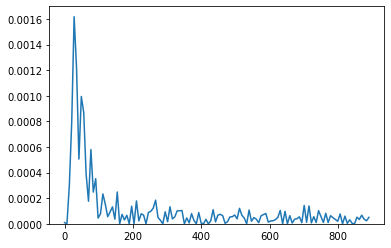

In [149]:
sns.distplot(maxabs, hist=False)

In [150]:
maxabs_completo[['Age_2', 'SibSp_2', 'Parch_2', 'Fare_2']].describe()

,Age_2,SibSp_2,Parch_2,Fare_2
count,183.000000,183.000000,183.000000,183.000000
mean,0.445930,0.154827,0.118852,0.153578
std,0.195548,0.214720,0.188654,0.149021
min,0.011500,0.000000,0.000000,0.000000
25%,0.300000,0.000000,0.000000,0.057971
50%,0.450000,0.000000,0.000000,0.111257
75%,0.593750,0.333333,0.250000,0.175668
max,1.000000,1.000000,1.000000,1.000000


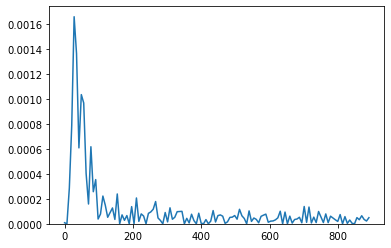

In [151]:
sns.distplot(maxabs_completo, hist=False)

## Comparacion - Max Abs Scaler

Nuevamente, al comparar los analisis estadisticos de ambos sets de datos, se puede concluir que son muy similares. En este sentido, este metodo es bastante buenos tambien.

Al igual que la vez anterior, si observamos la grafica de distribucion se puede notar que aun se esta lejos de una distribucion normal. La variacion entre los puntos tambien se redujo comparandolo contra el metodo de estandarizacion.

Este metodo es muy bueno, y es practicamente igual de bueno que el metodo de **Min Max**